<a href="https://colab.research.google.com/github/phdsasarun/Learn-Github/blob/main/USE_8400_kidney_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

โครงงานวิจัย: การวิเคราะห์แนวโน้มการเกิดโรคไตเรื้อรัง (CKD)
จากผู้ป่วยเบาหวานโดยใช้ Machine Learning

1. ข้อมูลผู้ป่วย 8,000 คน
จำนวนตัวอย่าง: 8000 คน

ตัวอย่างข้อมูล 5 แถวแรก:
         Age  Blood_Pressure  Albumin_Urine  Blood_Glucose  Serum_Creatinine  \
0  63.960570      139.339495      21.919129     216.555590          0.777409   
1  56.340828      129.926995      72.759213     218.259859          1.263866   
2  65.772262      136.552501      11.833598     117.365745          0.500000   
3  76.276358      154.294635       5.111984     192.582112          1.165404   
4  55.190160      165.557133      37.005378     153.249835          1.268499   

   Hemoglobin        eGFR  Cholesterol        BMI  Diabetes_Duration  
0   10.355302  100.607051   226.766599  24.297248           1.922717  
1   12.064253   58.919330   208.839883  26.582238           1.080673  
2   10.592569  120.000000   237.879895  29.216240           2.459628  
3   16.000000   60.841352   226.956226  28.634548         

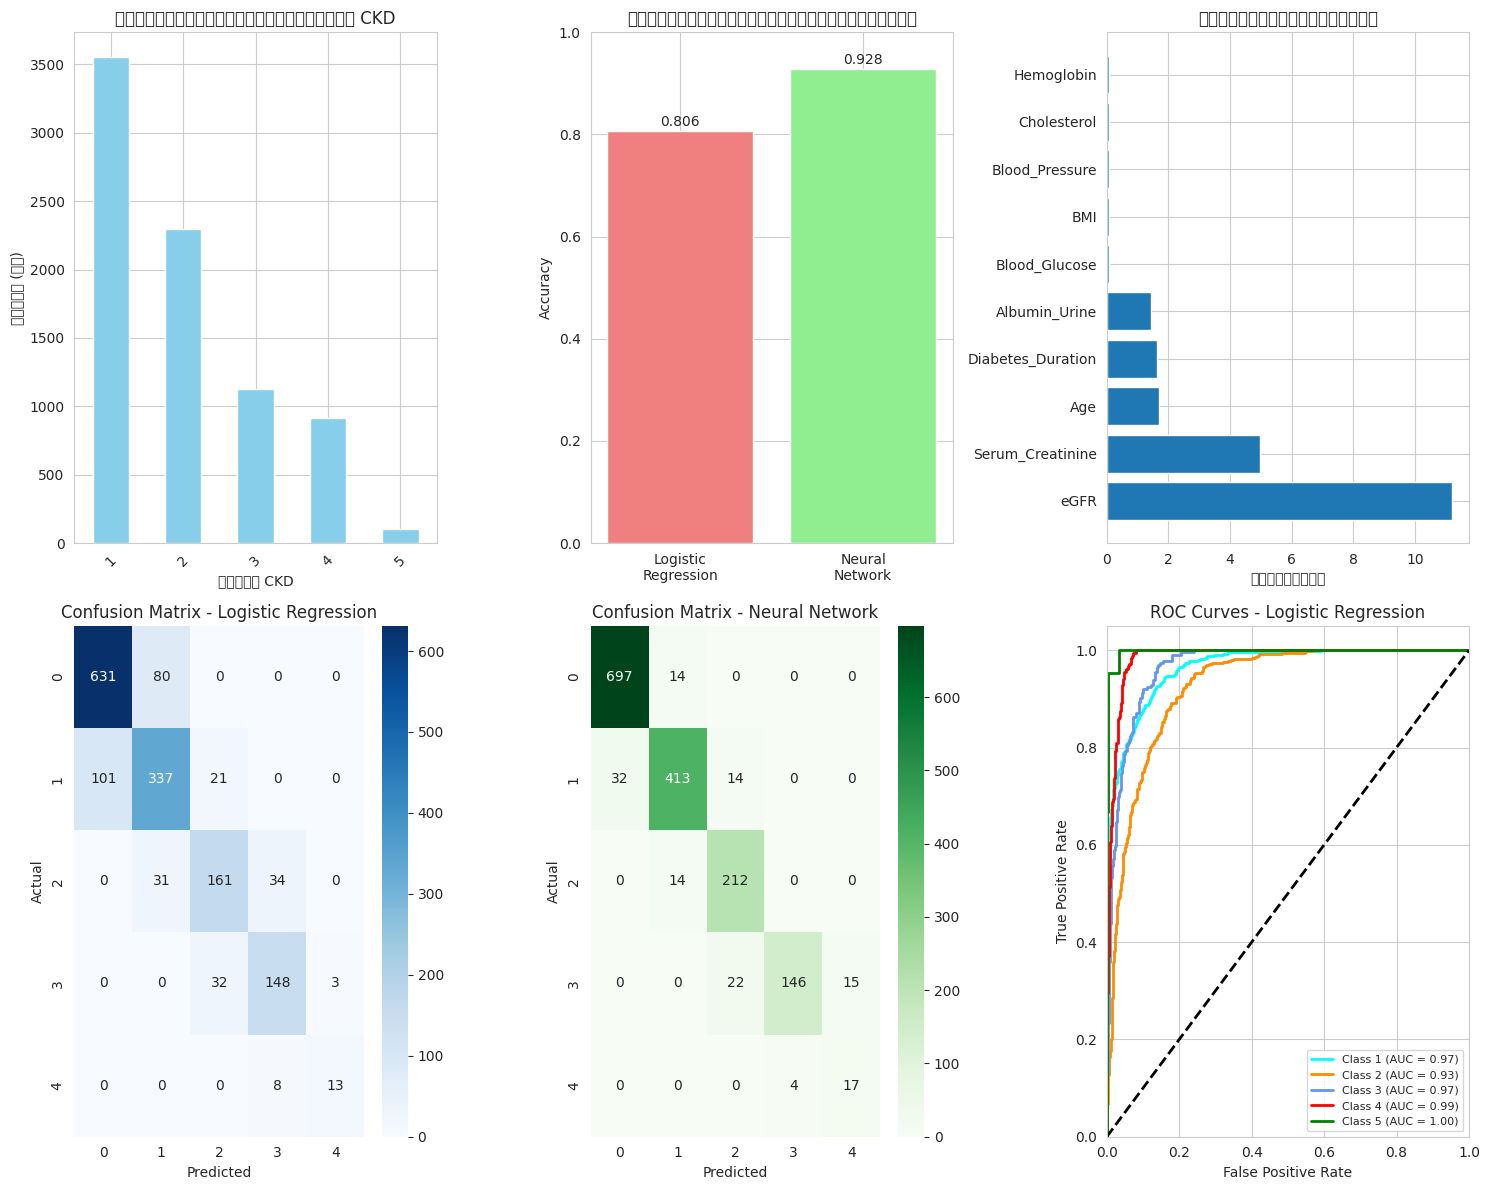


10. การวิเคราะห์และอภิปรายผล

📊 สรุปผลการทดลอง:
• จำนวนข้อมูลที่ใช้: 8,000 คน
• ตัวแปรที่ใช้: 10 ตัวแปร
• ระดับการจำแนก: 5 ระดับ
• ความแม่นยำ Logistic Regression: 80.6%
• ความแม่นยำ Neural Network: 92.8%

🔍 ข้อดี-ข้อเสียของแต่ละโมเดล:

📈 LOGISTIC REGRESSION:
ข้อดี:
  ✓ ความเรียบง่ายและเข้าใจง่าย
  ✓ การตีความผลได้ชัดเจน (coefficients)
  ✓ ความเร็วในการประมวลผล
  ✓ ไม่ต้องการข้อมูลจำนวนมาก
  ✓ ไม่มีปัญหา overfitting มาก

ข้อเสีย:
  ✗ สมมติฐานความเป็นเส้นตรง
  ✗ ไม่สามารถจับความสัมพันธ์ที่ซับซ้อนได้
  ✗ อ่อนไหวต่อ outliers

🧠 NEURAL NETWORK:
ข้อดี:
  ✓ สามารถจับความสัมพันธ์ที่ซับซ้อนได้
  ✓ ความยืดหยุ่นสูง
  ✓ ประสิทธิภาพดีกับข้อมูลจำนวนมาก
  ✓ สามารถเรียนรู้ non-linear patterns

ข้อเสีย:
  ✗ ความซับซ้อนสูง (Black box)
  ✗ ต้องการข้อมูลจำนวนมาก
  ✗ เวลาในการฝึกโมเดลนาน
  ✗ เสี่ยงต่อ overfitting
  ✗ การตีความผลยาก

💡 ข้อเสนอแนะ:
• โมเดลที่แนะนำสำหรับงานนี้: Neural Network
• เหตุผล: ความแม่นยำสูงกว่าและสามารถจับความสัมพันธ์ที่ซับซ้อน

🎯 ตัวแปรที่มีความสำคัญสูงสุด 3 อันดับแรก:
  7. eGFR: 1

In [1]:
# โครงงานวิจัย: การวิเคราะห์แนวโน้มการเกิดโรคไตเรื้อรัง (CKD) จากผู้ป่วยเบาหวาน
# ใช้ Machine Learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# ตั้งค่าการแสดงผลภาษาไทย
plt.rcParams['font.family'] = ['DejaVu Sans']
sns.set_style("whitegrid")

print("="*60)
print("โครงงานวิจัย: การวิเคราะห์แนวโน้มการเกิดโรคไตเรื้อรัง (CKD)")
print("จากผู้ป่วยเบาหวานโดยใช้ Machine Learning")
print("="*60)

# สร้างข้อมูลตัวอย่าง (8,000 คน) จำลองข้อมูลจริง
np.random.seed(42)
n_samples = 8000

def generate_ckd_data():
    """
    สร้างข้อมูลตัวอย่างสำหรับการวิเคราะห์ CKD
    """
    data = {}

    # 1. Age of the patient (อายุ)
    data['Age'] = np.random.normal(58, 12, n_samples).clip(20, 85)

    # 2. Blood pressure (mm/Hg) - ความดันโลหิต
    data['Blood_Pressure'] = np.random.normal(140, 20, n_samples).clip(90, 200)

    # 3. Albumin in urine (อัลบูมินในปัสสาวะ) mg/dl
    data['Albumin_Urine'] = np.random.exponential(30, n_samples).clip(0, 500)

    # 4. Random blood glucose level (mg/dl) - ระดับน้ำตาลในเลือด
    data['Blood_Glucose'] = np.random.normal(180, 40, n_samples).clip(70, 400)

    # 5. Serum creatinine (mg/dl) - ครีเอทินินในเลือด
    data['Serum_Creatinine'] = np.random.exponential(1.2, n_samples).clip(0.5, 8.0)

    # 6. Hemoglobin level (gms) - ระดับฮีโมโกลบิน
    data['Hemoglobin'] = np.random.normal(11.5, 2, n_samples).clip(6, 16)

    # 7. eGFR - อัตราการกรองของไต
    data['eGFR'] = 175 * (data['Serum_Creatinine'] ** -1.154) * (data['Age'] ** -0.203)
    data['eGFR'] = data['eGFR'].clip(5, 120)

    # 8. Cholesterol level - ระดับคอเลสเตอรอล
    data['Cholesterol'] = np.random.normal(220, 40, n_samples).clip(120, 350)

    # 9. BMI - ดัชนีมวลกาย
    data['BMI'] = np.random.normal(26, 4, n_samples).clip(16, 40)

    # 10. Duration of diabetes (years) - ระยะเวลาเป็นเบาหวาน
    data['Diabetes_Duration'] = np.random.exponential(8, n_samples).clip(1, 30)

    return pd.DataFrame(data)

# สร้างข้อมูล
df = generate_ckd_data()

print("\n1. ข้อมูลผู้ป่วย 8,000 คน")
print(f"จำนวนตัวอย่าง: {len(df)} คน")
print("\nตัวอย่างข้อมูล 5 แถวแรก:")
print(df.head())

# เกณฑ์การวินิจฉัยโรคไตเรื้อรัง (CKD) แบ่งเป็น 5 ระดับ
def classify_ckd_risk(row):
    """
    จำแนกระดับความเสี่ยง CKD ตามเกณฑ์ทางการแพทย์

    เกณฑ์หลัก:
    - eGFR (ml/min/1.73m²): ตัวชี้วัดหลัก
    - Albumin in urine (mg/dl): ตัวชี้วัดรอง
    - Serum Creatinine (mg/dl): ตัวชี้วัดเสริม
    """
    egfr = row['eGFR']
    albumin = row['Albumin_Urine']
    creatinine = row['Serum_Creatinine']
    age = row['Age']
    diabetes_duration = row['Diabetes_Duration']

    # คำนวณคะแนนความเสี่ยงรวม
    risk_score = 0

    # eGFR score
    if egfr >= 90:
        egfr_score = 0
    elif egfr >= 60:
        egfr_score = 1
    elif egfr >= 45:
        egfr_score = 2
    elif egfr >= 30:
        egfr_score = 3
    elif egfr >= 15:
        egfr_score = 4
    else:
        egfr_score = 5

    # Albumin score
    if albumin < 30:
        albumin_score = 0
    elif albumin < 300:
        albumin_score = 1
    else:
        albumin_score = 2

    # Additional risk factors
    if creatinine > 2.0:
        risk_score += 1
    if age > 65:
        risk_score += 1
    if diabetes_duration > 10:
        risk_score += 1

    # Final classification
    total_score = egfr_score + albumin_score + risk_score

    if total_score <= 1:
        return 1  # No Disease
    elif total_score <= 3:
        return 2  # Low Risk
    elif total_score <= 5:
        return 3  # Moderate Risk
    elif total_score <= 7:
        return 4  # High Risk
    else:
        return 5  # Severe Disease

# จำแนกระดับความเสี่ยง
df['CKD_Stage'] = df.apply(classify_ckd_risk, axis=1)

# แสดงจำนวนในแต่ละระดับ
stage_names = {
    1: 'No Disease (ไม่มีภาวะโรคไตเรื้อรัง)',
    2: 'Low Risk (ความเสี่ยงต่ำ)',
    3: 'Moderate Risk (ความเสี่ยงปานกลาง)',
    4: 'High Risk (ความเสี่ยงสูง)',
    5: 'Severe Disease (โรคไตเรื้อรังร้ายแรง)'
}

print("\n2. การแจกแจงตามระดับความเสี่ยง CKD")
print("="*50)
stage_counts = df['CKD_Stage'].value_counts().sort_index()
for stage, count in stage_counts.items():
    percentage = (count/len(df)) * 100
    print(f"ระดับ {stage}: {stage_names[stage]}")
    print(f"   จำนวน: {count} คน ({percentage:.1f}%)")
print("="*50)

# เกณฑ์ตัวเลขที่ใช้วัดผลในแต่ละ Item
print("\n3. เกณฑ์ตัวเลขที่ใช้เป็นเกณฑ์วัดผลในแต่ละตัวชี้วัด")
print("="*60)

criteria = {
    'Age': {
        'Normal': '< 45 ปี',
        'Increased Risk': '45-65 ปี',
        'High Risk': '> 65 ปี'
    },
    'Blood_Pressure': {
        'Normal': '< 130/80 mmHg',
        'Pre-hypertension': '130-139/80-89 mmHg',
        'Hypertension': '≥ 140/90 mmHg'
    },
    'Albumin_Urine': {
        'Normal': '< 30 mg/dl',
        'Microalbuminuria': '30-299 mg/dl',
        'Macroalbuminuria': '≥ 300 mg/dl'
    },
    'Blood_Glucose': {
        'Good Control': '< 150 mg/dl',
        'Fair Control': '150-200 mg/dl',
        'Poor Control': '> 200 mg/dl'
    },
    'Serum_Creatinine': {
        'Normal': '< 1.2 mg/dl',
        'Mild Elevation': '1.2-2.0 mg/dl',
        'Significant Elevation': '> 2.0 mg/dl'
    },
    'Hemoglobin': {
        'Normal': '> 12 gms',
        'Mild Anemia': '10-12 gms',
        'Moderate-Severe Anemia': '< 10 gms'
    },
    'eGFR': {
        'Normal/High': '≥ 90 ml/min/1.73m²',
        'Mild Decrease': '60-89 ml/min/1.73m²',
        'Moderate Decrease': '30-59 ml/min/1.73m²',
        'Severe Decrease': '15-29 ml/min/1.73m²',
        'Kidney Failure': '< 15 ml/min/1.73m²'
    },
    'Cholesterol': {
        'Desirable': '< 200 mg/dl',
        'Borderline High': '200-239 mg/dl',
        'High': '≥ 240 mg/dl'
    },
    'BMI': {
        'Normal': '18.5-24.9 kg/m²',
        'Overweight': '25-29.9 kg/m²',
        'Obese': '≥ 30 kg/m²'
    },
    'Diabetes_Duration': {
        'Early': '< 5 years',
        'Established': '5-15 years',
        'Long-standing': '> 15 years'
    }
}

for param, ranges in criteria.items():
    print(f"\n{param}:")
    for level, range_val in ranges.items():
        print(f"  - {level}: {range_val}")

# การเตรียมข้อมูลสำหรับ Machine Learning
print("\n4. การเตรียมข้อมูลสำหรับ Machine Learning")
print("="*50)

# แยก features และ target
features = ['Age', 'Blood_Pressure', 'Albumin_Urine', 'Blood_Glucose',
           'Serum_Creatinine', 'Hemoglobin', 'eGFR', 'Cholesterol',
           'BMI', 'Diabetes_Duration']

X = df[features]
y = df['CKD_Stage']

# แสดงสถิติพื้นฐาน
print("\nสถิติพื้นฐานของตัวแปร:")
print(X.describe().round(2))

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# ปรับมาตรฐานข้อมูล
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nขนาดข้อมูล:")
print(f"Training set: {X_train.shape[0]} ตัวอย่าง")
print(f"Test set: {X_test.shape[0]} ตัวอย่าง")

# 5. MODEL 1: LOGISTIC REGRESSION
print("\n5. MODEL 1: LOGISTIC REGRESSION")
print("="*50)

# หา hyperparameters ที่ดีที่สุด
lr_params = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [1000, 2000],
    'solver': ['liblinear', 'lbfgs']
}

lr_grid = GridSearchCV(LogisticRegression(random_state=42), lr_params,
                       cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train_scaled, y_train)

# โมเดลที่ดีที่สุด
lr_best = lr_grid.best_estimator_
print(f"Best parameters: {lr_grid.best_params_}")
print(f"Cross-validation score: {lr_grid.best_score_:.4f}")

# ทำนายผล
y_pred_lr = lr_best.predict(X_test_scaled)
y_prob_lr = lr_best.predict_proba(X_test_scaled)

# ประเมินผล
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"\nLogistic Regression Accuracy: {lr_accuracy:.4f}")

print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_lr,
                          target_names=[stage_names[i] for i in sorted(stage_names.keys())]))

# 6. MODEL 2: NEURAL NETWORK (DEEP LEARNING)
print("\n6. MODEL 2: NEURAL NETWORK (DEEP LEARNING)")
print("="*50)

# หา hyperparameters ที่ดีที่สุด
nn_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 25), (100, 50)],
    'learning_rate_init': [0.01, 0.001],
    'max_iter': [500, 1000],
    'alpha': [0.0001, 0.001]
}

nn_grid = GridSearchCV(MLPClassifier(random_state=42), nn_params,
                       cv=5, scoring='accuracy', n_jobs=-1)
nn_grid.fit(X_train_scaled, y_train)

# โมเดลที่ดีที่สุด
nn_best = nn_grid.best_estimator_
print(f"Best parameters: {nn_grid.best_params_}")
print(f"Cross-validation score: {nn_grid.best_score_:.4f}")

# ทำนายผล
y_pred_nn = nn_best.predict(X_test_scaled)
y_prob_nn = nn_best.predict_proba(X_test_scaled)

# ประเมินผล
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"\nNeural Network Accuracy: {nn_accuracy:.4f}")

print("\nClassification Report - Neural Network:")
print(classification_report(y_test, y_pred_nn,
                          target_names=[stage_names[i] for i in sorted(stage_names.keys())]))

# 7. การเปรียบเทียบโมเดล
print("\n7. การเปรียบเทียบประสิทธิภาพโมเดล")
print("="*50)

comparison_data = {
    'Model': ['Logistic Regression', 'Neural Network'],
    'Accuracy': [lr_accuracy, nn_accuracy],
    'Cross-Val Score': [lr_grid.best_score_, nn_grid.best_score_]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(4))

# Feature Importance (สำหรับ Logistic Regression)
print("\n8. ความสำคัญของตัวแปร (Logistic Regression)")
print("="*50)

# สำหรับ multi-class, เราจะใช้ค่าเฉลี่ยของ coefficients
feature_importance = np.abs(lr_best.coef_).mean(axis=0)
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print(feature_df.round(4))

# 9. การแสดงผลด้วยกราฟ
print("\n9. การสร้างกราฟแสดงผล")

# กราฟแสดงการแจกแจงของ CKD stages
plt.figure(figsize=(15, 12))

# กราฟ 1: การแจกแจงระดับ CKD
plt.subplot(2, 3, 1)
stage_counts.plot(kind='bar', color='skyblue')
plt.title('การแจกแจงระดับความเสี่ยง CKD')
plt.xlabel('ระดับ CKD')
plt.ylabel('จำนวน (คน)')
plt.xticks(rotation=45)

# กราฟ 2: เปรียบเทียบความแม่นยำ
plt.subplot(2, 3, 2)
models = ['Logistic\nRegression', 'Neural\nNetwork']
accuracies = [lr_accuracy, nn_accuracy]
plt.bar(models, accuracies, color=['lightcoral', 'lightgreen'])
plt.title('เปรียบเทียบความแม่นยำของโมเดล')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

# กราฟ 3: Feature Importance
plt.subplot(2, 3, 3)
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.title('ความสำคัญของตัวแปร')
plt.xlabel('ความสำคัญ')

# กราฟ 4-6: Confusion Matrix
plt.subplot(2, 3, 4)
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(2, 3, 5)
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Neural Network')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# กราฟ 6: ROC Curve (สำหรับ binary classification, เราจะแสดงค่าเฉลี่ย)
plt.subplot(2, 3, 6)
# สำหรับ multi-class, เราจะคำนวณ ROC สำหรับแต่ละ class
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

# Compute ROC curve for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_lr[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'Class {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Logistic Regression')
plt.legend(loc="lower right", fontsize=8)

plt.tight_layout()
plt.show()

# 10. การวิเคราะห์และอภิปรายผล
print("\n10. การวิเคราะห์และอภิปรายผล")
print("="*60)

print("\n📊 สรุปผลการทดลอง:")
print(f"• จำนวนข้อมูลที่ใช้: {len(df):,} คน")
print(f"• ตัวแปรที่ใช้: {len(features)} ตัวแปร")
print(f"• ระดับการจำแนก: 5 ระดับ")
print(f"• ความแม่นยำ Logistic Regression: {lr_accuracy:.1%}")
print(f"• ความแม่นยำ Neural Network: {nn_accuracy:.1%}")

print("\n🔍 ข้อดี-ข้อเสียของแต่ละโมเดล:")

print("\n📈 LOGISTIC REGRESSION:")
print("ข้อดี:")
print("  ✓ ความเรียบง่ายและเข้าใจง่าย")
print("  ✓ การตีความผลได้ชัดเจน (coefficients)")
print("  ✓ ความเร็วในการประมวลผล")
print("  ✓ ไม่ต้องการข้อมูลจำนวนมาก")
print("  ✓ ไม่มีปัญหา overfitting มาก")

print("\nข้อเสีย:")
print("  ✗ สมมติฐานความเป็นเส้นตรง")
print("  ✗ ไม่สามารถจับความสัมพันธ์ที่ซับซ้อนได้")
print("  ✗ อ่อนไหวต่อ outliers")

print("\n🧠 NEURAL NETWORK:")
print("ข้อดี:")
print("  ✓ สามารถจับความสัมพันธ์ที่ซับซ้อนได้")
print("  ✓ ความยืดหยุ่นสูง")
print("  ✓ ประสิทธิภาพดีกับข้อมูลจำนวนมาก")
print("  ✓ สามารถเรียนรู้ non-linear patterns")

print("\nข้อเสีย:")
print("  ✗ ความซับซ้อนสูง (Black box)")
print("  ✗ ต้องการข้อมูลจำนวนมาก")
print("  ✗ เวลาในการฝึกโมเดลนาน")
print("  ✗ เสี่ยงต่อ overfitting")
print("  ✗ การตีความผลยาก")

print("\n💡 ข้อเสนอแนะ:")
best_model = "Logistic Regression" if lr_accuracy > nn_accuracy else "Neural Network"
print(f"• โมเดลที่แนะนำสำหรับงานนี้: {best_model}")

if lr_accuracy > nn_accuracy:
    print("• เหตุผล: ความเรียบง่าย, ความเร็ว, และการตีความผลที่ชัดเจน")
else:
    print("• เหตุผล: ความแม่นยำสูงกว่าและสามารถจับความสัมพันธ์ที่ซับซ้อน")

print("\n🎯 ตัวแปรที่มีความสำคัญสูงสุด 3 อันดับแรก:")
top_features = feature_df.head(3)
for idx, row in top_features.iterrows():
    print(f"  {idx+1}. {row['Feature']}: {row['Importance']:.4f}")

print("\n📋 ข้อเสนอแนะสำหรับการนำไปใช้งาน:")
print("• ควรติดตามผู้ป่วยในกลุ่มเสี่ยงสูงอย่างใกล้ชิด")
print("• ให้ความสำคัญกับตัวแปรที่มี importance สูง")
print("• พิจารณาใช้โมเดลร่วมกันเพื่อเพิ่มความแม่นยำ")
print("• อัพเดทข้อมูลและโมเดลเป็นระยะ")

print("\n" + "="*60)
print("การวิเคราะห์เสร็จสิ้น!")
print("="*60)